# Verify Jupyter Notebooks

Este notebook testa uma lista de notebooks usados no curso e verifica se sua execução ocorre sem problemas

In [1]:
import os
import time
from IPython.utils.io import CapturedIO
from IPython.display import display
import nbformat
import re

In [2]:
os.makedirs('../tmp',exist_ok=True)

## Função que extrai a lista de todos os notebooks do arquivo de index

In [3]:
def nb_index2list(nb_index):
    nb = nbformat.read(nb_index, as_version=4)
    nn = [ncell['source']  for ncell in nb['cells'] if ncell['cell_type']=='markdown']
    nb_list = [re.findall('\((.+?).ipynb\)',nn_each) for nn_each in nn]
    nb_list = sum(nb_list, [])
    return nb_list

In [4]:
nbl = nb_index2list('../PyTorch/0_index.ipynb')

In [5]:
nblist = ['ExercicioIntrodutorio',
 'Matrizes_Arrays_Tensores', # demora 14 segundos
 'MovingMean_Momentum',
 #'Cats_and_dogs',          # problema no predict
 #'RegressaoLinearDemo',    # esse zera o output do script de testes
 'LinearRegressionIrisNumPy',
 'LinearRegressionIris-Tensor',
 'LinearRegressionIris-Tensor-Solucao',
 'PyTorch_Variaveis_Gradientes',
 'LinearRegressionIrisPyTorch',
 'LinearRegressionIrisOptimizer',
         ]

In [6]:
nblist1 = [
 'LogisticRegressionIris',  # demora 16 segundos
 'LogisticRegressionMNIST',
 'datasets-e-dataloaders',
 'LogisticRegressionMNIST-SGD',
 'Activations_pytorch',
 'Iris-dataset-2-ou-mais-camadas-fronteira-dinamica', # demora 12 segundos
 'underfitting-overfitting-regularization',
 'RegressaoLinearOtimizadores',  # demora 204 segundos
 'optimizer',
 'MNIST_neuralnet',
]

In [7]:
nblist2 = [
 'boston_housing',
 'Predict_Boston_House_Prices',  # demora 13 seg
 'batch_norm_basics_pytorch',
 'credit_card_fraud_detection_kaggle_pytorch',  # demora 64 seg
 'AnaliseSentimento_IMDB_bagwords', # demora 51 s
 'autoencoder', # demora 26s
 'model_selection_mnist', # demora 50s
 'Explorando-Convolucao-no-PyTorch',
 'Introducao-CNN-PyTorch',
 'cifar10-CNN-features', # demora 26s
]

In [17]:
nblist3 = [
 'Models_ImageNet',  # 194s pois carregou o resnet152, está com ERRO, provavelmente de mudança de versão
 'lenet-mnist',  # 310s devido ao treinamento de 10 mil amostras  - Precisa MELHORIAS, não tem modelo salvo
 'data_augmentation_catsdogs', # 4s OK
 'transfer_learning_catsdogs', # está com mesmo erro da ImageNet - alguma coisa deve ter mudado para 0.3
 'facial_features',  # está com o mesmo erro de transfer learning
 'fully_convolutional', # está com ERRO, dependo do lenet-mnist model salvo
 'segmentation_carvana', # está muito demorado devido leitura disco, está com ERRO, modelos não estão no /data
 'svhn_dnt', # 37s, demorando predict. OK, mas pode ser melhorado
 'vae_mnist', #  está faltando copiar as imagens salvas durante treinamento para o /data
 'vae_celeba', # o mesmo que vae_mnist, porém o predict demora mais tempo
]

In [24]:
log_nb

[{'exectime': 0.3618888854980469, 'nbname': 'dcgan_mnist'},
 {'exectime': 0.046514034271240234, 'nbname': 'transposed_convolution'},
 {'exectime': 3.6312339305877686, 'nbname': 'movieLens_dataset'},
 {'exectime': 0.04078102111816406, 'nbname': 'embedding-basics-pytorch'},
 {'exectime': 0.13712692260742188, 'nbname': 'sistema_recomendacao'},
 {'exectime': 4.723803758621216, 'nbname': 'livros_dataset'},
 {'exectime': 0.01246786117553711, 'nbname': 'livros_preprocessing'},
 {'exectime': 35.59974503517151, 'nbname': 'livros_classif'},
 {'exectime': 2.1295361518859863, 'nbname': 'livros_classif_w2v'},
 {'exectime': 18.180197954177856, 'nbname': 'analise_sentimento_imdb'}]

In [ ]:
nblist4 = [
 'dcgan_mnist',  # ERRO é preciso copiar as imagens
 'transposed_convolution', # OK
 'movieLens_dataset',   # OK 3.6s
 'embedding-basics-pytorch', # OK
 'sistema_recomendacao', # está faltando copiar o models dot
 'livros_dataset', # dá erro aqui, mas no notebook está OK
 'livros_preprocessing', # OK
 'livros_classif', # 14s
 'livros_classif_w2v', # ERRO é preciso copiar o modelo treinado para /data/models
 'analise_sentimento_imdb', # falta colocar modelo no /data
]

In [40]:
nblist5 = [
 'simpleRNN_numerical', # OK
 'simpleRNN_MNIST', # OK 08s
 'analise_sentimento_lstm_imdb', # OK 470s
 'seq2seq-translation']

[NbConvertApp] Converting notebook ../PyTorch/simpleRNN_MNIST.ipynb to script
[NbConvertApp] Writing 9703 bytes to ../tmp/simpleRNN_MNIST.py
EXEC start: simpleRNN_MNIST
/Users/robertoalotufo/mylocalprojects/rnap/PyTorch
GPU available: False
xin.shape: torch.Size([2, 28, 28])
Variable containing:
-0.0799 -0.1242  0.1083 -0.0098  0.0523 -0.0585 -0.0007 -0.0226  0.0092 -0.0141
-0.0778 -0.1271  0.1120 -0.0156  0.0575 -0.0551  0.0080 -0.0262  0.0094 -0.0129
[torch.FloatTensor of size 2x10]

Acc: 0.9759
xin.shape: torch.Size([2, 28, 28])
Variable containing:
1.00000e-02 *
 -1.9646 -0.1547 -0.6171 -0.9728 -6.7952  3.4234  5.0173  0.1637 -0.3532 -4.8030
 -1.8207 -0.1261 -0.5906 -0.6466 -6.4083  2.9849  4.6576  0.0960 -0.3185 -5.1410
[torch.FloatTensor of size 2x10]

Acc:  0.9874
EXEC end : 0.8794801235198975


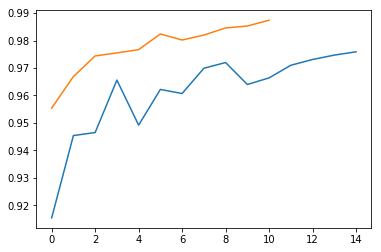

In [44]:
#%%capture res
log_nb = []
for nb in nblist5[1:2]:
    !jupyter nbconvert --output-dir='../tmp' --to 'script' ../PyTorch/{nb}
    nbd = dict()
    nbd['nbname'] = nb
    print('EXEC start:',nb)
    t_init = time.time()
    %cd ../PyTorch/
    %run ../tmp/{nb}
    dt = time.time() - t_init
    nbd['exectime'] = dt
    log_nb.append(nbd)
    print('EXEC end :', dt)
    #for r in results:
    #    if 'SyntaxError' in r:
    #        print(nb,r)

In [43]:
log_nb

[{'exectime': 470.0424118041992, 'nbname': 'analise_sentimento_lstm_imdb'}]

In [162]:
print(res.stderr)

Using TensorFlow backend.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   38.1s finished



In [164]:
print(res.stdout)

EXEC start: Activations_pytorch
/Users/robertoalotufo/mylocalprojects/rnap/PyTorch
EXEC end : 0.554213285446167
EXEC start: Iris-dataset-2-ou-mais-camadas-fronteira-dinamica
/Users/robertoalotufo/mylocalprojects/rnap/PyTorch
Modelo(
  (dense): Sequential(
    (0): Linear(in_features=2, out_features=5)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=3)
  )
)
Final loss: 0.37586498260498047
dense.0.weight  torch.Size([5, 2])
dense.0.bias    torch.Size([5])
dense.2.weight  torch.Size([3, 5])
dense.2.bias    torch.Size([3])

Training Accuracy:  0.8
EXEC end : 8.48151683807373
EXEC start: underfitting-overfitting-regularization
/Users/robertoalotufo/mylocalprojects/rnap/PyTorch
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Losses:  T=0.20151,  V=0.37039
Losses:  T=0.09393,  V=0.15879
Losses:  T=0.09558,  V=0.18014
Losses:  T=0.11259,  V=0.22019
EXEC end : 1.7561900615692139
EXEC start: RegressaoLinearOtimizadores
/Users/robertoalotufo/mylocal

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


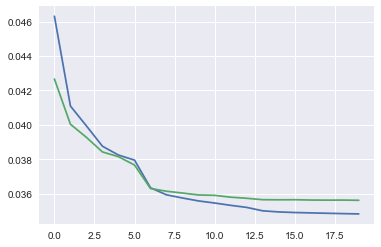

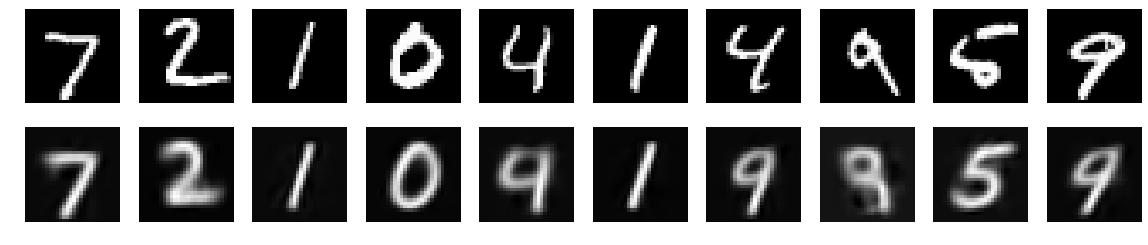

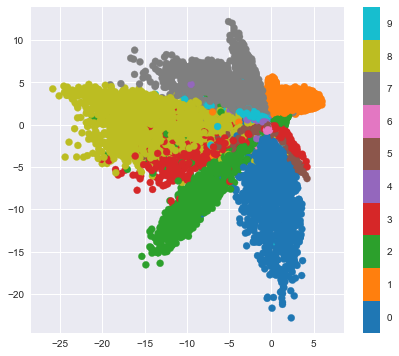

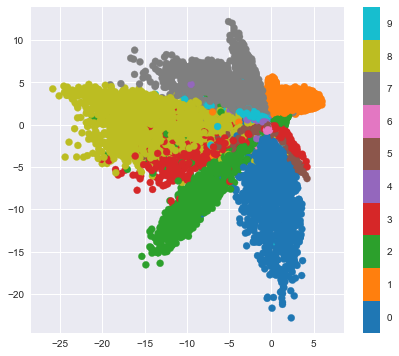

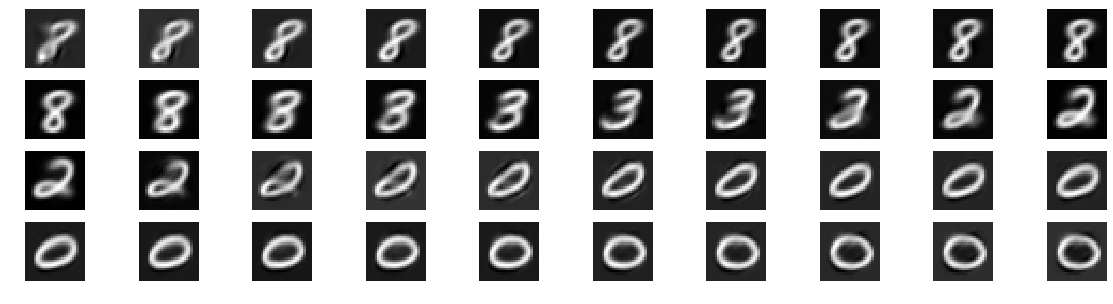

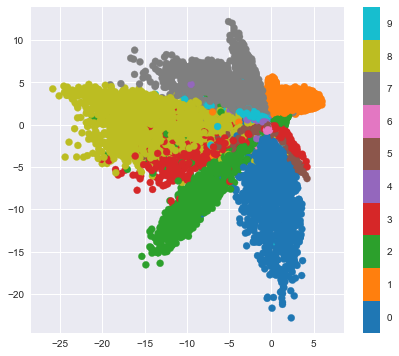

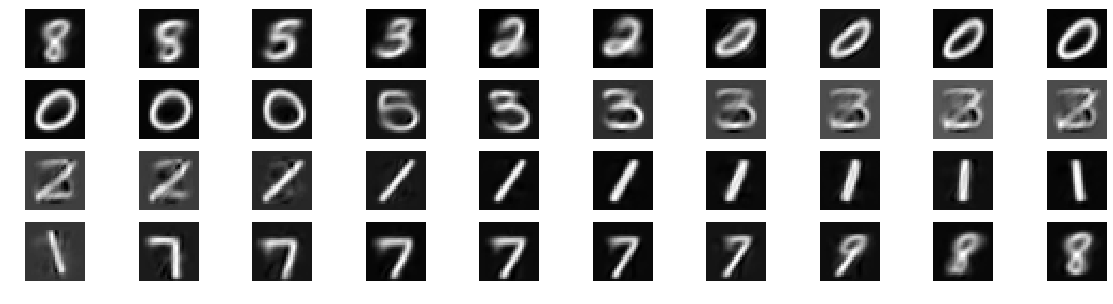

In [169]:
for r in res.outputs:
    display(r)